In [1]:
import numpy as np

# Classic Circuits

<p>
1 <- 00
<br>
0 <- 01
<br>
0 <- 10
<br>
0 <- 11
<br>
== 0
</p>

<p>
0 <- 00
<br>
0 <- 01
<br>
1 <- 10
<br>
0 <- 11
<br>
== 2
</p>

In [6]:
# Representing Classical State
class Cstate:
    def __init__(self,n):
        # number of bits
        self.n = n

        # create vector of size 2^n
        # [ 0, 0 ] ** n
        self.state = np.zeros(2**self.n, dtype=np.int32) # had to change to int32

        # initialize the value to 0
        # by setting index 0 of the state to 1
        self.state[0] = 1

In [8]:
# Testing that it shows the correct value
print(Cstate(2).state)

[1 0 0 0]


## Operations

<p>
NOT matrix for 1 bit number:
<br>
0 1
<br>
1 0
</p>
<p>
| 0 1 | | 1 | = | 0 |
<br>
| 1 0 | | 0 | = | 1 |
<br>
Uses the not matrix on a 1 bit integer with value 0
</p>

<p>
    To make a NOT matrix that only applies to the ith bit of an integer, <br>
    ex: 0th bit is 0001, 1st bit is 0010, 2nd  bit is 0100, etc... <br>
    We must compose the NOT with two identity matrices <br>
    One identity matrix ensures bits before i are untouched, the other says the <br>bits after are untouched
</p>

To do this we must take the Kronecker product on the identity matricx of bits befre i and after 0, and of the bits after i and up to n <br>
The Kronecker product simply multiplies all of the squares in one matrix with the other matrix. For example: <br>
|1 0| .... |0 1| <br>
|0 1| kr |1 0| = <br>
|0 1 0 0| <br>
|1 0 0 0| <br>
|0 0 0 1| <br>
|0 0 1 0| <br>
Then to compose NOT, you must do: <br>
(I<sub>2^i</sub>) kr NOT kr (I<sub>2^(n-i-1)</sub>)

In [10]:
# Cool hack I found to let me define new methods in the same class
# https://stackoverflow.com/questions/45161393/jupyter-split-classes-in-multiple-cells
class Cstate(Cstate):
    def op(self, t, i):
        """
        Runs operations on the ith bit, adapts them to the size of the matrix
        takes the transformation matrix t
        """
        # I_{2^i} creates identity matrix of size 2^i
        eyeL = np.eye(2**i, dtype=np.int32)

        # I_{2^(n-i-1)} creates an identity matrix
        # t.shape**0.5 denotes how many bits t applies to
        # in case of NOT, t.shape[0]**0.5 == 1
        eyeR = np.eye(2**(self.n - i - int(t.shape[0]**0.5)), dtype = np.int32)

        # eyeL kr t kr eyeR ==
        # eyeL ⊗ t ⊗ eyeR == Kronecker product
        t_all = np.kron(np.kron(eyeL, t), eyeR)

        # apply transformation to state
        self.state = np.matmul(t_all, self.state)

    def NOT(self, i):
        """
        Performs NOT on the ith bit
        """
        not_matrix = np.array([
            [0,1],
            [1,0]
        ])
        self.op(not_matrix, i)
        

In [19]:
# Test NOT
instance = Cstate(2)
instance.NOT(0)
# 00 -> not(0) -> 10
print (instance.state)
instance.NOT(1)
# 10 -> not(1) -> 11
print (instance.state)

[0 0 1 0]
[0 0 0 1]


In [31]:
# Bnary operation to swap two bits
class Cstate(Cstate):
    def swap(self, i):
        """
        Swaps the ith and (i+1)th  bits
        """
        swap_matrix = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1]
        ])
        self.op(swap_matrix, i)
instance = Cstate(2)
instance.NOT(0)
instance.swap(0)
# 10 -> swap(0) -> 01
print(instance.state)

[0 1 0 0]


In [33]:
# Implement AND and OR
class Cstate(Cstate):
    def AND(self, i):
        """
        ANDs the ith and (i+1)th bits
        """
        and_matrix = np.array([
            [1, 0, 1, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 0],
            [0, 0, 0, 1]
        ])
        self.op(and_matrix, i)
        
    def OR(self, i):
        """
        ORs the ith and (i+1)th bits
        """
        or_matrix = np.array([
            [1, 0, 0, 0],
            [0, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 1, 0, 1]
        ])
        self.op(or_matrix, i)

In [36]:
# test AND
instance = Cstate(2)
instance.NOT(0) # negate first bit
instance.NOT(1) # negate the second bit
instance.AND(0) # AND the first and second bits

print(instance.state)

[0 0 0 1]


# Quantum Circuits

Instead of bits, we have qubits. <br>
Qubits can be 0,1, or a superposition of the two. ex: <br>
0 | 1/sqrt(2) | <br>
1 | 1/sqrt(2) | <br>
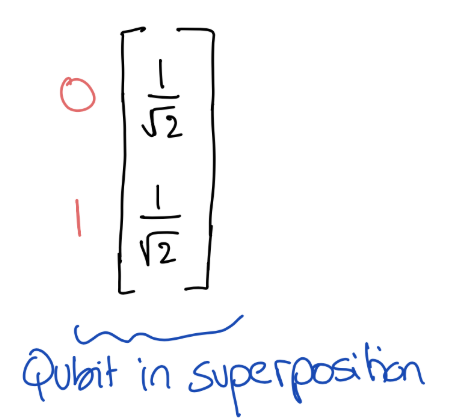
<br>
This is read as a 1/2 probablility to read 0 and a 1/2 probability of reading 1. The probability is the square of the absolute value of 1/sqrt(2), and 1/sqrt(2) is the amplitude. Sum of probabilities should be 1. ex: <br>
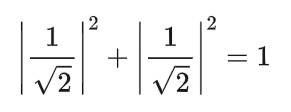

In [42]:
# Representing Quantum State
class Qstate:
    def __init__(self,n):
        # number of bits
        self.n = n
        self.state = np.zeros(2**self.n, dtype=np.complex128) # needed to change to 128
        self.state[0] = 1 # initialize qubits to 0s

## Quantum Gates
Transformations of quantum states are also matrices, but can include complex #s. <br>
The matrices are unitary -> invertible, the state represents a probability distribution <br>

### Hadamard Gate
Applies to a single Qubit. Puts the state into superposition. Ex: <br>
given the base state |0>, turns it into superposition: <br>
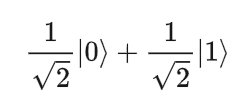

TODO: look at [grovers algorithm](https://quantum.country/search)

In [45]:
class Qstate(Qstate):
    def op(self, t, i):
        """
        Runs operations on the ith bit, adapts them to the size of the matrix
        takes the transformation matrix t
        Ripped straight from Cstate above
        """
        # I_{2^i} creates identity matrix of size 2^i
        eyeL = np.eye(2**i, dtype=np.complex128)

        # I_{2^(n-i-1)} creates an identity matrix
        # t.shape**0.5 denotes how many bits t applies to
        # in case of NOT, t.shape[0]**0.5 == 1
        eyeR = np.eye(2**(self.n - i - int(t.shape[0]**0.5)), dtype = np.complex128)

        # eyeL kr t kr eyeR ==
        # eyeL ⊗ t ⊗ eyeR == Kronecker product
        t_all = np.kron(np.kron(eyeL, t), eyeR)

        # apply transformation to state
        self.state = np.matmul(t_all, self.state)

    def hadamard(self, i):
        isq2 = 1 / np.sqrt(2)
        h_matrix = isq2 * np.array([
            [1, 1],
            [1,-1]
        ])
        self.op(h_matrix, i)

In [48]:
# Test Hadamard
instance = Qstate(1)
instance.hadamard(0)
print(1 / np.sqrt(2)) # inverse square root of two
print(instance.state)

0.7071067811865475
[0.70710678+0.j 0.70710678+0.j]


### Controlled NOT gate
Classically it takes the XOR of two bits and stores the result int he second bit.
<br>In quantum it allows us to entangle two qubits

In [49]:
class Qstate(Qstate):
    def cnot(self, i):
        cnot_matrix = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1],
            [0, 0, 1, 0]
        ])
        self.op(cnot_matrix, i)

In [58]:
# Test Qstate
instance = Qstate(2)
print(instance.state)
instance.hadamard(0)
print(instance.state)
instance.cnot(0)
print(instance.state)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### S and T Gates
Don't change the probability of measurement, change the phase of amplitudes.
<br> This is how the S gate works: <br>
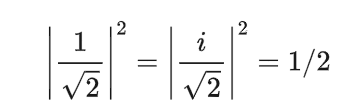
<br>The T gate is similar, but it changes the amplitude in a different way

In [60]:
# j means imaginary, so 2j means 2i
class Qstate(Qstate):
    def s(self, i):
        s_matrix = np.array([
            [1, 0],
            [0, 1j]
        ])
        self.op(s_matrix, i)
    
    def t(self, i):
        isq2 = 1 / np.sqrt(2)
        t_matrix = np.array([
            [1,0],
            [0, isq2 + isq2 * 1j]
        ])
        self.op(t_matrix, i)

instance = Qstate(1)
instance.hadamard(0)
print(instance.state)
instance.s(0)
print(instance.state)

[0.70710678+0.j 0.70710678+0.j]
[0.70710678+0.j         0.        +0.70710678j]


### EPR pairs
Special entangled state of two qubits
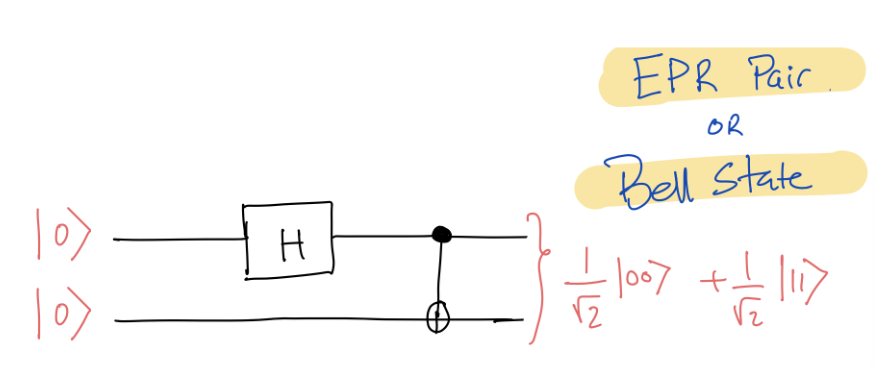
<br>
The two qubits are entagled, thus if we measure the first bit, 0 & 1 have equal probabililty. But the other qubit will also collapse to the same value. <br>
[Key Ingredients in Quantum Teleportation](https://quantum.country/teleportation)

In [61]:
# constructing EPR Pairs
s = Qstate(2)
s.hadamard(0)
s.cnot(0)
print(s.state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Final Notes
<ul>
    <li>Simulator gets exponentially slower with more qubits</li>
    <li>Simulator doesn't implement measurement, represents probability equally</li>
    <li>Our binary gates only work on contiguous bits (ith & (i+1)th) but can use swap to move bits next to each other</li>
</ul>

[For more reading](https://quantum.country/)